In [197]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/csk-vs-mi-match/deliveries.csv
/kaggle/input/csk-vs-mi-match/matches.csv


In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("../input/csk-vs-mi-match/deliveries.csv")
df.head()
df.info()
import os
print(os.listdir("../input"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [199]:
df1=pd.read_csv("../input/csk-vs-mi-match/matches.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# QUES 1

In [200]:
df2=df1[['id','team1','team2','winner','result','toss_winner','toss_decision','season',]]
df2.head()


,id,team1,team2,winner,result,toss_winner,toss_decision,season
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,normal,Royal Challengers Bangalore,field,2017
1,2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,normal,Rising Pune Supergiant,field,2017
2,3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,normal,Kolkata Knight Riders,field,2017
3,4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,normal,Kings XI Punjab,field,2017
4,5,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,normal,Royal Challengers Bangalore,bat,2017


In [201]:
df3 = df2[(df2['team1']=='Mumbai Indians') & (df2['team2'] == 'Chennai Super Kings') | (df2['team1']=='Chennai Super Kings') & (df2['team2'] == 'Mumbai Indians')]
df3



,id,team1,team2,winner,result,toss_winner,toss_decision,season
66,67,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,normal,Mumbai Indians,field,2008
95,96,Chennai Super Kings,Mumbai Indians,Mumbai Indians,normal,Mumbai Indians,field,2008
117,118,Mumbai Indians,Chennai Super Kings,Mumbai Indians,normal,Chennai Super Kings,field,2009
161,162,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,normal,Mumbai Indians,bat,2009
193,194,Chennai Super Kings,Mumbai Indians,Mumbai Indians,normal,Mumbai Indians,field,2010
210,211,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,normal,Chennai Super Kings,bat,2010
233,234,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,normal,Chennai Super Kings,bat,2010
256,257,Mumbai Indians,Chennai Super Kings,Mumbai Indians,normal,Chennai Super Kings,field,2011
307,308,Chennai Super Kings,Mumbai Indians,Mumbai Indians,normal,Mumbai Indians,field,2012
354,355,Chennai Super Kings,Mumbai Indians,Mumbai Indians,normal,Mumbai Indians,field,2012


In [202]:
df3['winner'].value_counts()


Mumbai Indians         17
Chennai Super Kings    11
Name: winner, dtype: int64

In [203]:
total_matches=df3['id'].nunique()
total_matches

28

Text(0, 11, '11')

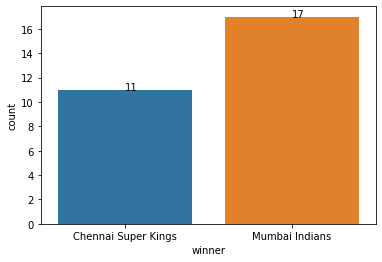

In [204]:
sns.countplot(df3['winner'])

plt.text(1,17,str(17))
plt.text(0,11,str(11))

In [205]:
df3['toss_decision'].value_counts()

field    15
bat      13
Name: toss_decision, dtype: int64

In [206]:
matches_played=pd.concat([df1['team1'],df1['team2']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played['wins']=df1['winner'].value_counts().reset_index()['winner']

matches_played.set_index('Team',inplace=True)
matches_played.reset_index().head(8)


,Team,Total Matches,wins
0,Mumbai Indians,187,109
1,Royal Challengers Bangalore,180,100
2,Kolkata Knight Riders,178,92
3,Delhi Capitals,177,84
4,Kings XI Punjab,176,82
5,Chennai Super Kings,164,77
6,Rajasthan Royals,147,75
7,Sunrisers Hyderabad,108,58


In [207]:
win_percentage = round(matches_played['wins']/matches_played['Total Matches'],3)*100
win_percentage.head(8)

Team
Mumbai Indians                 58.3
Royal Challengers Bangalore    55.6
Kolkata Knight Riders          51.7
Delhi Capitals                 47.5
Kings XI Punjab                46.6
Chennai Super Kings            47.0
Rajasthan Royals               51.0
Sunrisers Hyderabad            53.7
dtype: float64

In [208]:
total=df1.groupby('team1')['id'].count() + df1.groupby('team2')['id'].count()
total

team1
Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                 177
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
Name: id, dtype: int64

Text(0.5, 1.0, 'WIN PERCENTAGE BY TEAMS')

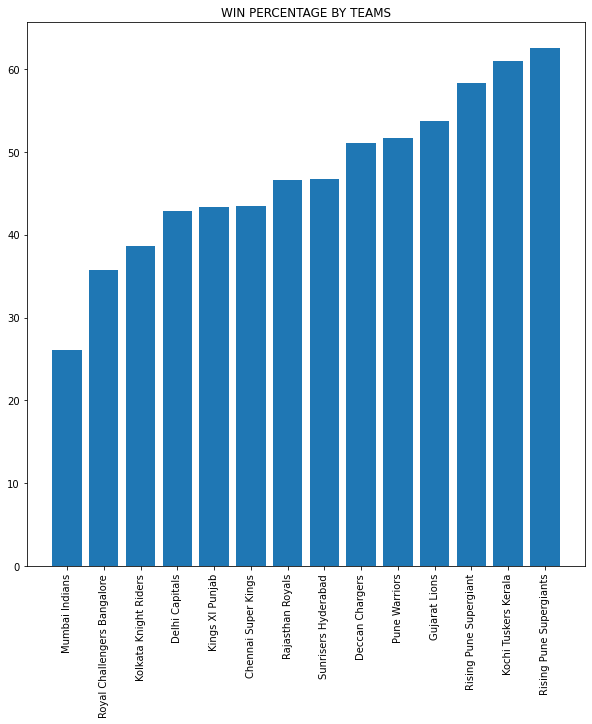

In [209]:
plt.figure(figsize=(10,10))
plt.bar(win_percentage.index,((df1['winner'].value_counts()/ total)*100).sort_values())
plt.xticks(rotation=90)
plt.title('WIN PERCENTAGE BY TEAMS')

In [210]:
last_3=df3[df3['season']>2016]
last_3['winner'].value_counts()

Mumbai Indians         5
Chennai Super Kings    1
Name: winner, dtype: int64

Text(0, 1, '1')

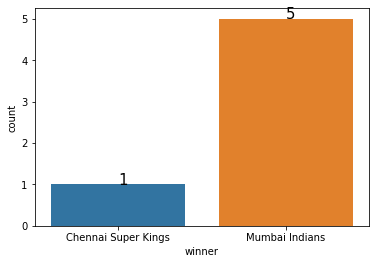

In [211]:
sns.countplot(last_3['winner'],data=last_3)
plt.text(1,5,str(5),fontsize=15)
plt.text(0,1,str(1),fontsize=15)

# QUES 2

In [212]:
df6= df[['match_id','batsman','bowling_team','batsman_runs','over','ball']]
df6=df6[(df6['batsman'] == 'Q de Kock') & (df6['bowling_team'] == 'Chennai Super Kings')]
df6=df6.fillna(0)
df6

,match_id,batsman,bowling_team,batsman_runs,over,ball
97960,414,Q de Kock,Chennai Super Kings,0,1,1
97961,414,Q de Kock,Chennai Super Kings,4,1,2
97962,414,Q de Kock,Chennai Super Kings,0,1,3
114358,483,Q de Kock,Chennai Super Kings,0,1,1
114359,483,Q de Kock,Chennai Super Kings,0,1,2
...,...,...,...,...,...,...
178851,11415,Q de Kock,Chennai Super Kings,1,4,3
178855,11415,Q de Kock,Chennai Super Kings,1,5,1
178857,11415,Q de Kock,Chennai Super Kings,0,5,3
178858,11415,Q de Kock,Chennai Super Kings,6,5,4


In [213]:
df6=df6[(df6['batsman_runs']==4) | (df6['batsman_runs']==6)]  


In [214]:
df6.set_index(['match_id'],inplace=True) 
df6
  

,batsman,bowling_team,batsman_runs,over,ball
match_id,,,,,
414,Q de Kock,Chennai Super Kings,4,1,2
483,Q de Kock,Chennai Super Kings,4,1,6
483,Q de Kock,Chennai Super Kings,4,3,5
483,Q de Kock,Chennai Super Kings,4,3,6
483,Q de Kock,Chennai Super Kings,6,4,3
483,Q de Kock,Chennai Super Kings,6,4,6
7917,Q de Kock,Chennai Super Kings,6,3,3
7917,Q de Kock,Chennai Super Kings,6,4,5
7917,Q de Kock,Chennai Super Kings,4,8,2


In [215]:
df7=df6.groupby(['match_id','over','ball']).agg({'batsman_runs':'sum'})
df7


batsman_runs
match_id over ball              
414      1    2                4
483      1    6                4
         3    5                4
              6                4
         4    3                6
              6                6
7917     3    3                6
         4    5                6
         8    2                4
         10   2                6
         12   7                6
11151    3    2                4
11335    3    1                6
              2                4
11412    2    5                4
         3    4                4
11415    3    1                6
              4                6
              6                6
         5    4                6

# QUES 3

In [216]:
a= df[['match_id','bowler','ball','over','batting_team','player_dismissed','bye_runs','legbye_runs','total_runs']]
a['runs against bowler'] = a['total_runs'] - (a['bye_runs'] + a['legbye_runs'])
a=a[(a['bowler'] == 'JJ Bumrah') | (a['bowler'] == 'TA Boult') | (a['bowler'] == 'RD Chahar') | (a['bowler'] == 'KH Pandya') | (a['bowler'] == 'HH Pandya') |  (a['bowler'] == 'KA Pollard')]
a=a[(a['batting_team']=='Chennai Super Kings')]
a=a.fillna(0)
a

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,match_id,bowler,ball,over,batting_team,player_dismissed,bye_runs,legbye_runs,total_runs,runs against bowler
49787,211,KA Pollard,1,12,Chennai Super Kings,0,0,0,1,1
49788,211,KA Pollard,2,12,Chennai Super Kings,0,0,0,1,1
49789,211,KA Pollard,3,12,Chennai Super Kings,0,0,0,1,1
49790,211,KA Pollard,4,12,Chennai Super Kings,0,0,0,1,1
49791,211,KA Pollard,5,12,Chennai Super Kings,0,0,0,4,4
...,...,...,...,...,...,...,...,...,...,...
179067,11415,JJ Bumrah,2,19,Chennai Super Kings,DJ Bravo,0,0,0,0
179068,11415,JJ Bumrah,3,19,Chennai Super Kings,0,0,0,2,2
179069,11415,JJ Bumrah,4,19,Chennai Super Kings,0,0,0,0,0
179070,11415,JJ Bumrah,5,19,Chennai Super Kings,0,0,0,2,2


In [217]:
a['ball'] = a['ball'].apply(lambda x: 1  if x!= 0 else 0)
a

,match_id,bowler,ball,over,batting_team,player_dismissed,bye_runs,legbye_runs,total_runs,runs against bowler
49787,211,KA Pollard,1,12,Chennai Super Kings,0,0,0,1,1
49788,211,KA Pollard,1,12,Chennai Super Kings,0,0,0,1,1
49789,211,KA Pollard,1,12,Chennai Super Kings,0,0,0,1,1
49790,211,KA Pollard,1,12,Chennai Super Kings,0,0,0,1,1
49791,211,KA Pollard,1,12,Chennai Super Kings,0,0,0,4,4
...,...,...,...,...,...,...,...,...,...,...
179067,11415,JJ Bumrah,1,19,Chennai Super Kings,DJ Bravo,0,0,0,0
179068,11415,JJ Bumrah,1,19,Chennai Super Kings,0,0,0,2,2
179069,11415,JJ Bumrah,1,19,Chennai Super Kings,0,0,0,0,0
179070,11415,JJ Bumrah,1,19,Chennai Super Kings,0,0,0,2,2


In [218]:
balls=0
for index,a in a.iterrows():
    if((a['bowler']=='JJ Bumrah') & (a['runs against bowler']==0)):
         balls=balls+1
       


# QUES 4

In [219]:
df4=df[['match_id','batting_team','bowling_team','batsman_runs','over']]
df4= df4[(df4['batting_team']=='Mumbai Indians') & (df4['bowling_team'] == 'Chennai Super Kings') | (df4['batting_team']=='Chennai Super Kings') & (df4['bowling_team'] == 'Mumbai Indians')]
df4=df4[(df4['batsman_runs']==4) | (df4['batsman_runs']==6)]  
df4



,match_id,batting_team,bowling_team,batsman_runs,over
15490,67,Chennai Super Kings,Mumbai Indians,4,1
15496,67,Chennai Super Kings,Mumbai Indians,4,2
15498,67,Chennai Super Kings,Mumbai Indians,4,2
15500,67,Chennai Super Kings,Mumbai Indians,4,3
15501,67,Chennai Super Kings,Mumbai Indians,6,3
...,...,...,...,...,...
179052,11415,Chennai Super Kings,Mumbai Indians,4,16
179061,11415,Chennai Super Kings,Mumbai Indians,6,18
179062,11415,Chennai Super Kings,Mumbai Indians,6,18
179063,11415,Chennai Super Kings,Mumbai Indians,6,18


In [220]:
df4.reset_index(inplace = True, drop = True)   
df4 

,match_id,batting_team,bowling_team,batsman_runs,over
0,67,Chennai Super Kings,Mumbai Indians,4,1
1,67,Chennai Super Kings,Mumbai Indians,4,2
2,67,Chennai Super Kings,Mumbai Indians,4,2
3,67,Chennai Super Kings,Mumbai Indians,4,3
4,67,Chennai Super Kings,Mumbai Indians,6,3
...,...,...,...,...,...
1083,11415,Chennai Super Kings,Mumbai Indians,4,16
1084,11415,Chennai Super Kings,Mumbai Indians,6,18
1085,11415,Chennai Super Kings,Mumbai Indians,6,18
1086,11415,Chennai Super Kings,Mumbai Indians,6,18


In [221]:
df4.set_index(['over'],inplace=True) 
df4
  

,match_id,batting_team,bowling_team,batsman_runs
over,,,,
1,67,Chennai Super Kings,Mumbai Indians,4
2,67,Chennai Super Kings,Mumbai Indians,4
2,67,Chennai Super Kings,Mumbai Indians,4
3,67,Chennai Super Kings,Mumbai Indians,4
3,67,Chennai Super Kings,Mumbai Indians,6
...,...,...,...,...
16,11415,Chennai Super Kings,Mumbai Indians,4
18,11415,Chennai Super Kings,Mumbai Indians,6
18,11415,Chennai Super Kings,Mumbai Indians,6


In [223]:
df5=df4.groupby(['over','batsman_runs']).agg({'batsman_runs':'count'})
df5


batsman_runs
over batsman_runs              
1    4                       32
     6                        1
2    4                       49
     6                        8
3    4                       38
     6                       13
4    4                       59
     6                       16
5    4                       60
     6                       23
6    4                       59
     6                       23
7    4                       27
     6                        6
8    4                       22
     6                        7
9    4                       28
     6                       13
10   4                       32
     6                       12
11   4                       36
     6                       16
12   4                       31
     6                        9
13   4                       24
     6                       14
14   4                       40
     6                       19
15   4                       30
     6                       21
16   4                       40
     6                       20
17   4                       42
     6                       21
18   4                       30
     6                       34
19   4                       40
     6                       30
20   4                       32
     6                       31

In [ ]:
# from above analysis we can see that in every over we have a four and a six during MI VS CSK.So chances of both in a single over are very high.So both can take place(6 and 4) in more than 7 overs according to options provided. 

# QUES 5